# 1 Imports

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image,display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
import os
import datetime


# 1.0 module not found

In [ ]:
# !pip install --upgrade pip
# !pip install pandas
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install matplotlib
# !pip install tensorflow

In [ ]:
df = pd.read_csv("../data/USD-EGP Time series Data - Sheet1.csv")
df.head()

In [ ]:
df.info()

# 2.0 Data cleaning

In [ ]:
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
df["Date.1"] = pd.to_datetime(df['Date.1'], format='%m/%d/%Y %H:%M:%S')
df["Date.2"] = pd.to_datetime(df['Date.2'], format='%m/%d/%Y %H:%M:%S')


df.rename(columns = {"Close" : "USD","Close.1":"EUR","Close.2":"GBP"},inplace = True)
df.head()

#### some dates dont match on all currencies

In [ ]:
n1 = set(df["Date"])
n2 = set(df["Date.1"])
n3 = set(df["Date.2"])

uncommon = {*(n1^n2), *(n1^n3) , *(n2^n3)}
len(uncommon)

In [ ]:
common = list(set(df["Date"]) & set(df["Date.1"]) & set(df["Date.2"]))
len(common)

In [ ]:
df_clean = pd.DataFrame({"Date": df["Date"],"USD":None,"EUR":None,"GBP":None})
df_clean.info()

In [ ]:
df_clean.set_index("Date")

#### reorder each currency row by its correct date
else set it as null

In [ ]:
def cln1(df,date,st,dt):
    for i,g in zip(df[dt].values,df[st].values):
        if i == date:
            return g
    return None


for i in range(6218):
    
    x = df_clean["Date"][i]
    
    us =  cln1(df,x,"USD","Date") 
    eu = cln1(df,x,"EUR","Date.1") 
    gb = cln1(df,x,"GBP","Date.2")
    
    df_clean['USD'][i] = us
    df_clean['EUR'][i] = eu
    df_clean['GBP'][i] = gb
    
df_clean

#### replace each null value 
by the average of the cell before it and after it.<br>if null it would take the cell before that or after that.

In [ ]:
def cln2(df,col):
    for i in range(df_clean.shape[0]):
        if df_clean[col][i] == None:
            
            x1 = df_clean[col][i]
            x2 = df_clean[col][i]
            c1 = 1
            c2 = 1
            
            while(x2 == None):
                x2= df_clean[col][i+c2]
                c2 = c2+1  
                
            while(x1 == None):
                x1= df_clean[col][i-c1]
                c1 = c1+1
            print(df_clean[col][i],col,i)
            df_clean[col][i] = (x1+x2)/2
        
cln2(df_clean,"GBP")
cln2(df_clean,"EUR")

In [ ]:
df_clean[["USD","EUR","GBP"]].max(),df_clean[["USD","EUR","GBP"]].min()

#### Save and reuse 

In [ ]:
df_clean.to_csv("../data/USD-EUR-GBP to EGP Time series Data clean.csv",index = False)

# 3.0 Data improvment
#### only take data from dates after 2016, as it is more representing of current data.

In [4]:
df = pd.read_csv("../data/USD-EUR-GBP to EGP Time series Data clean.csv",index_col='Date')
df.index = pd.to_datetime(df.index)
df[["USD","EUR","GBP"]] =  df[["USD","EUR","GBP"]].apply(pd.to_numeric)

In [5]:
df = df.loc[datetime.date(year=2016,month=1,day=1):]
df.index

DatetimeIndex(['2016-01-01 23:58:00', '2016-01-02 23:58:00',
               '2016-01-03 23:58:00', '2016-01-04 23:58:00',
               '2016-01-05 23:58:00', '2016-01-06 23:58:00',
               '2016-01-07 23:58:00', '2016-01-08 23:58:00',
               '2016-01-09 23:58:00', '2016-01-10 23:58:00',
               ...
               '2023-02-27 23:58:00', '2023-02-28 23:58:00',
               '2023-03-01 23:58:00', '2023-03-02 23:58:00',
               '2023-03-03 23:58:00', '2023-03-04 23:58:00',
               '2023-03-05 23:58:00', '2023-03-06 23:58:00',
               '2023-03-07 23:58:00', '2023-03-08 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=2623, freq=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2623 entries, 2016-01-01 23:58:00 to 2023-03-08 23:58:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     2623 non-null   float64
 1   EUR     2623 non-null   float64
 2   GBP     2623 non-null   float64
dtypes: float64(3)
memory usage: 82.0 KB


#### scale each column with global minimum and maximum

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))

# scaler.data_min_ = min(df.min())
# scaler.data_max_ = max(df.max())

df_scaled = scaler.fit_transform(df)
df_scaled
df["USDs"] = df_scaled[:,0]
df["EURs"] = df_scaled[:,1]
df["GBPs"] = df_scaled[:,2]


In [8]:
df.index

DatetimeIndex(['2016-01-01 23:58:00', '2016-01-02 23:58:00',
               '2016-01-03 23:58:00', '2016-01-04 23:58:00',
               '2016-01-05 23:58:00', '2016-01-06 23:58:00',
               '2016-01-07 23:58:00', '2016-01-08 23:58:00',
               '2016-01-09 23:58:00', '2016-01-10 23:58:00',
               ...
               '2023-02-27 23:58:00', '2023-02-28 23:58:00',
               '2023-03-01 23:58:00', '2023-03-02 23:58:00',
               '2023-03-03 23:58:00', '2023-03-04 23:58:00',
               '2023-03-05 23:58:00', '2023-03-06 23:58:00',
               '2023-03-07 23:58:00', '2023-03-08 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=2623, freq=None)

In [9]:
df.iloc[:2098,:]

,USD,EUR,GBP,USDs,EURs,GBPs
Date,,,,,,
2016-01-01 23:58:00,7.71420,8.377621,11.373045,0.002939,0.001905,0.025595
2016-01-02 23:58:00,7.71420,8.341133,11.360934,0.002939,0.000441,0.025142
2016-01-03 23:58:00,7.71990,8.376863,11.374501,0.003185,0.001875,0.025650
2016-01-04 23:58:00,7.81040,8.453977,11.489098,0.007080,0.004969,0.029938
2016-01-05 23:58:00,7.80730,8.392848,11.456198,0.006946,0.002516,0.028707
...,...,...,...,...,...,...
2021-09-25 23:58:00,15.67307,18.394000,21.467250,0.345464,0.403752,0.403345
2021-09-26 23:58:00,15.66000,18.394000,21.448230,0.344902,0.403752,0.402633
2021-09-27 23:58:00,15.67770,18.374000,21.525180,0.345663,0.402950,0.405513


#### split into traning and testing

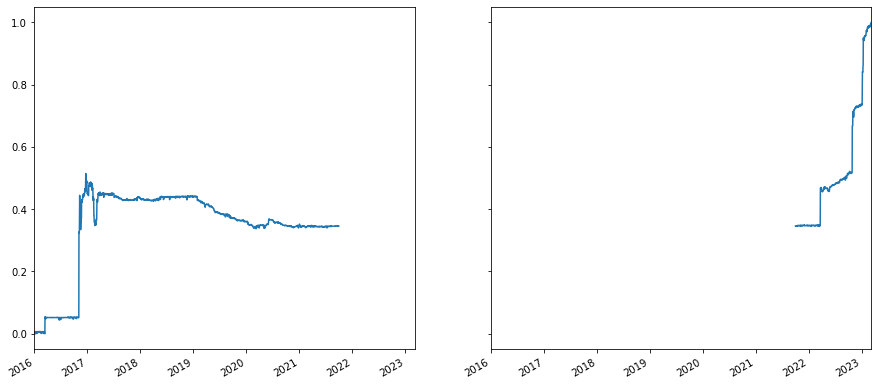

In [10]:


fig, (ax1,ax2) = plt.subplots(1,2, sharey = True,figsize = (15,7))

ax1.plot(df.iloc[:2098,:].index.to_pydatetime() ,df.iloc[:2098,:][["USDs"]]);
ax2.plot(df.iloc[2098:,:].index.to_pydatetime() ,df.iloc[2098:,:][["USDs"]]);
fig.autofmt_xdate()

ax1.set_xlim([datetime.date(2016, 1, 1), datetime.date(2023, 3, 8)]);
ax2.set_xlim([datetime.date(2016, 1, 1), datetime.date(2023, 3, 8)]);

In [11]:
df

,USD,EUR,GBP,USDs,EURs,GBPs
Date,,,,,,
2016-01-01 23:58:00,7.71420,8.377621,11.373045,0.002939,0.001905,0.025595
2016-01-02 23:58:00,7.71420,8.341133,11.360934,0.002939,0.000441,0.025142
2016-01-03 23:58:00,7.71990,8.376863,11.374501,0.003185,0.001875,0.025650
2016-01-04 23:58:00,7.81040,8.453977,11.489098,0.007080,0.004969,0.029938
2016-01-05 23:58:00,7.80730,8.392848,11.456198,0.006946,0.002516,0.028707
...,...,...,...,...,...,...
2023-03-04 23:58:00,30.72250,32.721000,36.933240,0.993144,0.978536,0.982119
2023-03-05 23:58:00,30.79377,32.721000,37.043620,0.996211,0.978536,0.986250
2023-03-06 23:58:00,30.82550,32.942000,37.073470,0.997577,0.987403,0.987367


In [247]:
x = df_scaled
y = df_scaled[:,0]

In [248]:
x[:3]

array([[0.00293942, 0.00190521, 0.02559548],
       [0.00293942, 0.00044134, 0.02514224],
       [0.00318473, 0.00187481, 0.02564995]])

In [249]:
y[:3]

array([0.00293942, 0.00293942, 0.00318473])

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state = 100, shuffle = False)

#### (2016 - 2022) training data

In [251]:
x_train.shape

(2098, 3)

In [252]:
y_train.shape

(2098,)

#### testing data ~ (2021 - 2023)

In [253]:
x_test.shape

(525, 3)

In [254]:
y_test.shape

(525,)

# 3.0 Modeling

#### Create generator for testing and tranning

In [255]:
days_found = 9
days_to_find =1
days = days_to_find + days_found
train_generator = TimeseriesGenerator(
    x_train,
    y_train,
    length = days,
    sampling_rate= 1,
    batch_size = 10
)
test_generator = TimeseriesGenerator(
    x_test,
    y_test,length = days,
    sampling_rate= 1,
    batch_size = 10
)

#### Model 

In [256]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64 , input_shape = (days,3),return_sequences =True))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.LSTM(64 , return_sequences = True))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(32 , return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [257]:
model.summary()

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_360 (LSTM)             (None, 10, 64)            17408     
                                                                 
 leaky_re_lu_240 (LeakyReLU)  (None, 10, 64)           0         
                                                                 
 lstm_361 (LSTM)             (None, 10, 64)            33024     
                                                                 
 leaky_re_lu_241 (LeakyReLU)  (None, 10, 64)           0         
                                                                 
 dropout_240 (Dropout)       (None, 10, 64)            0         
                                                                 
 lstm_362 (LSTM)             (None, 32)                12416     
                                                                 
 dropout_241 (Dropout)       (None, 32)             

#### Early stoppning function in case of a bad model

In [258]:
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, mode= "min")


model.compile(
            loss = tf.losses.MeanAbsoluteError(),
            optimizer = tf.optimizers.Adagrad(),
            metrics = [tf.metrics.MeanAbsoluteError()]
             ) 

In [259]:

history = model.fit_generator(train_generator, epochs = 50, validation_data = test_generator,
                             shuffle = False
,                             callbacks = [stop])
            

Epoch 1/50


C:\Users\Mgala\AppData\Local\Temp/ipykernel_16088/3572806062.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 50, validation_data = test_generator,


209/209 [==============================] - 8s 18ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - val_loss: 0.1892 - val_mean_absolute_error: 0.1892
Epoch 2/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - val_loss: 0.1737 - val_mean_absolute_error: 0.1737
Epoch 3/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - val_loss: 0.1713 - val_mean_absolute_error: 0.1713
Epoch 4/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - val_loss: 0.1674 - val_mean_absolute_error: 0.1674
Epoch 5/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - val_loss: 0.1643 - val_mean_absolute_error: 0.1643
Epoch 6/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - val_loss: 0.1599 - val_mean_absolute_error: 0.1599
Epoch 7/50
209/209 [=

209/209 [==============================] - 3s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - val_loss: 0.0778 - val_mean_absolute_error: 0.0778


In [260]:
model.metrics_names

['loss', 'mean_absolute_error']

In [261]:
model.evaluate_generator(test_generator, verbose = 0)

C:\Users\Mgala\AppData\Local\Temp/ipykernel_16088/1828663309.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.07778191566467285, 0.07778191566467285]

In [262]:
predictions = model.predict_generator(test_generator)

C:\Users\Mgala\AppData\Local\Temp/ipykernel_16088/2745777454.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [263]:
predictions.shape[0]

515

In [265]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][days:])] , axis = 1)

#### reverse the normilization
#### add the predicted values to the original values

In [266]:
rev_trans = scaler.inverse_transform(df_pred)

df_end = df[predictions.shape[0]*-1:]
df_end

,USD,EUR,GBP,USDs,EURs,GBPs
Date,,,,,,
2021-10-10 23:58:00,15.67450,18.163,21.38132,0.345526,0.394484,0.400129
2021-10-11 23:58:00,15.68770,18.161,21.36349,0.346094,0.394404,0.399462
2021-10-12 23:58:00,15.67880,18.115,21.33750,0.345711,0.392559,0.398489
2021-10-13 23:58:00,15.68460,18.224,21.47752,0.345960,0.396932,0.403729
2021-10-14 23:58:00,15.71880,18.222,21.48694,0.347432,0.396851,0.404082
...,...,...,...,...,...,...
2023-03-04 23:58:00,30.72250,32.721,36.93324,0.993144,0.978536,0.982119
2023-03-05 23:58:00,30.79377,32.721,37.04362,0.996211,0.978536,0.986250
2023-03-06 23:58:00,30.82550,32.942,37.07347,0.997577,0.987403,0.987367


In [267]:
df_end["USD-predict"] = rev_trans[:,0]

C:\Users\Mgala\AppData\Local\Temp/ipykernel_16088/337033914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end["USD-predict"] = rev_trans[:,0]


#### plot both

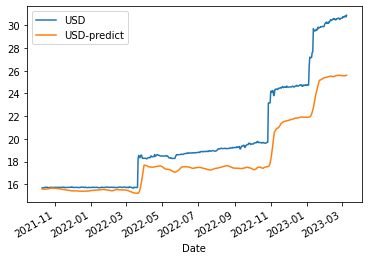

In [268]:
df_end[["USD","USD-predict"]].plot();

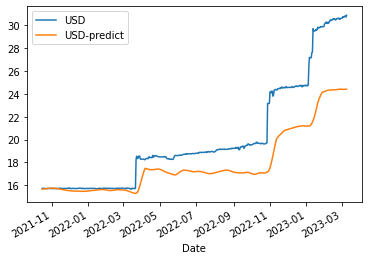

In [169]:
df_end[["USD","USD-predict"]].plot();

In [243]:
from sklearn.model_selection import ParameterGrid
param_grid = {'epoch': [10, 30,50], 'l1': [128,64,32],'l2':[128,64,32],'l3':[32,16],'days-batch':[[10,10],[15,30]]}
p = ParameterGrid(param_grid)        

In [244]:
def run1(e,l1,l2,l3,db):
    print("at: ",e,l1,l2,l3,db)
    
    # data generators
    train_generator = TimeseriesGenerator(
    x_train,
    y_train,
    length = db[0],
    sampling_rate= 1,
    batch_size = db[1]
    )
    test_generator = TimeseriesGenerator(
    x_test,
    y_test,length = db[0],
    sampling_rate= 1,
    batch_size = db[1]
    )
    
    # model definition
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(l1 , input_shape = (days,3),return_sequences =True))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.LSTM(l2 , return_sequences = True))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(l3 , return_sequences = False))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))
    
    # callback and grading
    stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, mode= "min")


    model.compile(
            loss = tf.losses.MeanAbsoluteError(),
            optimizer = tf.optimizers.Adagrad(),
            metrics = [tf.metrics.MeanAbsoluteError()]
             ) 
    
    # model tranining
    model.fit_generator(
        train_generator,
        epochs = e,
        validation_data = test_generator,
        shuffle = False,
        callbacks = [stop])
    
    
    # evaluation
    return model.evaluate_generator(test_generator, verbose = 0)


In [245]:
scores=[]
for i in list(p):
    scores.append(run1(i["epoch"],i['l1'],i['l2'],i['l3'],i['days-batch']))
    print(scores)


at:  10 128 128 32 [10, 10]
Epoch 1/10


C:\Users\Mgala\AppData\Local\Temp/ipykernel_16088/160683417.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


209/209 [==============================] - 8s 23ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - val_loss: 0.1798 - val_mean_absolute_error: 0.1798
Epoch 2/10
209/209 [==============================] - 4s 19ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - val_loss: 0.1705 - val_mean_absolute_error: 0.1705
Epoch 3/10
209/209 [==============================] - 4s 20ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - val_loss: 0.1696 - val_mean_absolute_error: 0.1696
Epoch 4/10
209/209 [==============================] - 4s 20ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - val_loss: 0.1616 - val_mean_absolute_error: 0.1616
Epoch 5/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - val_loss: 0.1606 - val_mean_absolute_error: 0.1606
Epoch 6/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.1529 - val_mean_absolute_error: 0.1529
Epoch 7/10
209/209 [=

C:\Users\Mgala\AppData\Local\Temp/ipykernel_16088/160683417.py:50: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  return model.evaluate_generator(test_generator, verbose = 0)


[[0.13845954835414886, 0.13845954835414886]]
at:  10 128 128 16 [10, 10]
Epoch 1/10
209/209 [==============================] - 8s 22ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - val_loss: 0.1852 - val_mean_absolute_error: 0.1852
Epoch 2/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - val_loss: 0.1719 - val_mean_absolute_error: 0.1719
Epoch 3/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - val_loss: 0.1681 - val_mean_absolute_error: 0.1681
Epoch 4/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - val_loss: 0.1641 - val_mean_absolute_error: 0.1641
Epoch 5/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - val_loss: 0.1594 - val_mean_absolute_error: 0.1594
Epoch 6/10
209/209 [==============================] - 4s 18ms/step - loss: 0.0706 - mean_absolute_erro

Epoch 6/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - val_loss: 0.1588 - val_mean_absolute_error: 0.1588
Epoch 7/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - val_loss: 0.1584 - val_mean_absolute_error: 0.1584
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - val_loss: 0.1543 - val_mean_absolute_error: 0.1543
Epoch 9/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - val_loss: 0.1528 - val_mean_absolute_error: 0.1528
Epoch 10/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
[[0.13845954835414886, 0.13845954835414886], [0.13564112782478333, 0.13564112782478333], [0.1418127864599228, 0.1418127864599228], [0.1369633823633194, 0.1369633823633194], [

209/209 [==============================] - 3s 12ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - val_loss: 0.1490 - val_mean_absolute_error: 0.1490
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - val_loss: 0.1494 - val_mean_absolute_error: 0.1494
Epoch 9/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - val_loss: 0.1451 - val_mean_absolute_error: 0.1451
Epoch 10/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - val_loss: 0.1430 - val_mean_absolute_error: 0.1430
[[0.13845954835414886, 0.13845954835414886], [0.13564112782478333, 0.13564112782478333], [0.1418127864599228, 0.1418127864599228], [0.1369633823633194, 0.1369633823633194], [0.14376387000083923, 0.14376387000083923], [0.15091314911842346, 0.15091314911842346], [0.13546277582645416, 0.13546277582645416], [0.14679260551929474, 0.14679260551929474], [

Epoch 4/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - val_loss: 0.1641 - val_mean_absolute_error: 0.1641
Epoch 5/10
209/209 [==============================] - 3s 13ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - val_loss: 0.1639 - val_mean_absolute_error: 0.1639
Epoch 6/10
209/209 [==============================] - 3s 13ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - val_loss: 0.1608 - val_mean_absolute_error: 0.1608
Epoch 7/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - val_loss: 0.1600 - val_mean_absolute_error: 0.1600
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - val_loss: 0.1512 - val_mean_absolute_error: 0.1512
Epoch 9/10
209/209 [==============================] - 3s 13ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - val_loss: 0.1506 - val_mean_absolute_error: 0.1506
Epoch 10/1

at:  10 32 32 16 [10, 10]
Epoch 1/10
209/209 [==============================] - 6s 13ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - val_loss: 0.1800 - val_mean_absolute_error: 0.1800
Epoch 2/10
209/209 [==============================] - 2s 9ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688
Epoch 3/10
209/209 [==============================] - 2s 9ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - val_loss: 0.1600 - val_mean_absolute_error: 0.1600
Epoch 4/10
209/209 [==============================] - 2s 9ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - val_loss: 0.1562 - val_mean_absolute_error: 0.1562
Epoch 5/10
209/209 [==============================] - 2s 9ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - val_loss: 0.1525 - val_mean_absolute_error: 0.1525
Epoch 6/10
209/209 [==============================] - 2s 9ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - val_loss: 0.1464 - val_mean_absolute_err

Epoch 1/30
209/209 [==============================] - 8s 21ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - val_loss: 0.1771 - val_mean_absolute_error: 0.1771
Epoch 2/30
209/209 [==============================] - 4s 17ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - val_loss: 0.1693 - val_mean_absolute_error: 0.1693
Epoch 3/30
209/209 [==============================] - 4s 17ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - val_loss: 0.1619 - val_mean_absolute_error: 0.1619
Epoch 4/30
209/209 [==============================] - 4s 17ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - val_loss: 0.1532 - val_mean_absolute_error: 0.1532
Epoch 5/30
209/209 [==============================] - 4s 17ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - val_loss: 0.1542 - val_mean_absolute_error: 0.1542
Epoch 6/30
209/209 [==============================] - 4s 17ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460
Epoch 7/30

209/209 [==============================] - 3s 14ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - val_loss: 0.1352 - val_mean_absolute_error: 0.1352
Epoch 16/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - val_loss: 0.1356 - val_mean_absolute_error: 0.1356
Epoch 17/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - val_loss: 0.1339 - val_mean_absolute_error: 0.1339
Epoch 18/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - val_loss: 0.1274 - val_mean_absolute_error: 0.1274
Epoch 19/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - val_loss: 0.1238 - val_mean_absolute_error: 0.1238
Epoch 20/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - val_loss: 0.1243 - val_mean_absolute_error: 0.1243
Epoch 21/30
209/

Epoch 29/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008
Epoch 30/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0939 - val_mean_absolute_error: 0.0939
[[0.13845954835414886, 0.13845954835414886], [0.13564112782478333, 0.13564112782478333], [0.1418127864599228, 0.1418127864599228], [0.1369633823633194, 0.1369633823633194], [0.14376387000083923, 0.14376387000083923], [0.15091314911842346, 0.15091314911842346], [0.13546277582645416, 0.13546277582645416], [0.14679260551929474, 0.14679260551929474], [0.14842502772808075, 0.14842502772808075], [0.14297178387641907, 0.14297179877758026], [0.15613436698913574, 0.15613436698913574], [0.1478339582681656, 0.1478339582681656], [0.1500438004732132, 0.1500438004732132], [0.14749731123447418, 0.14749731123447418], [0.15681743621826172, 0.1568174511194229], [0.1447920203208

209/209 [==============================] - 3s 13ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - val_loss: 0.1483 - val_mean_absolute_error: 0.1483
Epoch 7/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - val_loss: 0.1481 - val_mean_absolute_error: 0.1481
Epoch 8/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - val_loss: 0.1409 - val_mean_absolute_error: 0.1409
Epoch 9/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418
Epoch 10/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.1387 - val_mean_absolute_error: 0.1387
Epoch 11/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.1416 - val_mean_absolute_error: 0.1416
Epoch 12/30
209/209

209/209 [==============================] - 3s 14ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - val_loss: 0.1299 - val_mean_absolute_error: 0.1299
Epoch 20/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - val_loss: 0.1280 - val_mean_absolute_error: 0.1280
Epoch 21/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - val_loss: 0.1266 - val_mean_absolute_error: 0.1266
Epoch 22/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - val_loss: 0.1256 - val_mean_absolute_error: 0.1256
Epoch 23/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - val_loss: 0.1199 - val_mean_absolute_error: 0.1199
Epoch 24/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - val_loss: 0.1167 - val_mean_absolute_error: 0.1167
Epoch 25/30
209/

Epoch 1/30
209/209 [==============================] - 8s 18ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - val_loss: 0.2032 - val_mean_absolute_error: 0.2032
Epoch 2/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - val_loss: 0.1684 - val_mean_absolute_error: 0.1684
Epoch 3/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - val_loss: 0.1633 - val_mean_absolute_error: 0.1633
Epoch 4/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - val_loss: 0.1598 - val_mean_absolute_error: 0.1598
Epoch 5/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - val_loss: 0.1589 - val_mean_absolute_error: 0.1589
Epoch 6/30
209/209 [==============================] - 3s 14ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - val_loss: 0.1557 - val_mean_absolute_error: 0.1557
Epoch 7/30

209/209 [==============================] - 3s 13ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - val_loss: 0.1410 - val_mean_absolute_error: 0.1410
Epoch 14/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - val_loss: 0.1377 - val_mean_absolute_error: 0.1377
Epoch 15/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418
Epoch 16/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - val_loss: 0.1358 - val_mean_absolute_error: 0.1358
Epoch 17/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - val_loss: 0.1328 - val_mean_absolute_error: 0.1328
Epoch 18/30
209/209 [==============================] - 3s 13ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - val_loss: 0.1345 - val_mean_absolute_error: 0.1345
Epoch 19/30
209/

209/209 [==============================] - 3s 12ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - val_loss: 0.1083 - val_mean_absolute_error: 0.1083
Epoch 26/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - val_loss: 0.1081 - val_mean_absolute_error: 0.1081
Epoch 27/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055
Epoch 28/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.1040 - val_mean_absolute_error: 0.1040
Epoch 29/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.1018 - val_mean_absolute_error: 0.1018
Epoch 30/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0974 - val_mean_absolute_error: 0.0974
[[0.138459548354

Epoch 1/30
209/209 [==============================] - 8s 20ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - val_loss: 0.1802 - val_mean_absolute_error: 0.1802
Epoch 2/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - val_loss: 0.1725 - val_mean_absolute_error: 0.1725
Epoch 3/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - val_loss: 0.1728 - val_mean_absolute_error: 0.1728
Epoch 4/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - val_loss: 0.1636 - val_mean_absolute_error: 0.1636
Epoch 5/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - val_loss: 0.1643 - val_mean_absolute_error: 0.1643
Epoch 6/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - val_loss: 0.1598 - val_mean_absolute_error: 0.1598
Epoch 7/30

209/209 [==============================] - 3s 16ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - val_loss: 0.1464 - val_mean_absolute_error: 0.1464
Epoch 13/30
209/209 [==============================] - 3s 16ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - val_loss: 0.1451 - val_mean_absolute_error: 0.1451
Epoch 14/30
209/209 [==============================] - 3s 16ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - val_loss: 0.1436 - val_mean_absolute_error: 0.1436
Epoch 15/30
209/209 [==============================] - 3s 16ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - val_loss: 0.1410 - val_mean_absolute_error: 0.1410
Epoch 16/30
209/209 [==============================] - 3s 16ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - val_loss: 0.1393 - val_mean_absolute_error: 0.1393
Epoch 17/30
209/209 [==============================] - 3s 16ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - val_loss: 0.1363 - val_mean_absolute_error: 0.1363
Epoch 18/30
209/

Epoch 23/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - val_loss: 0.1202 - val_mean_absolute_error: 0.1202
Epoch 24/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - val_loss: 0.1143 - val_mean_absolute_error: 0.1143
Epoch 25/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - val_loss: 0.1105 - val_mean_absolute_error: 0.1105
Epoch 26/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - val_loss: 0.1080 - val_mean_absolute_error: 0.1080
Epoch 27/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - val_loss: 0.1049 - val_mean_absolute_error: 0.1049
Epoch 28/30
209/209 [==============================] - 3s 12ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - val_loss: 0.1026 - val_mean_absolute_error: 0.1026
Epoc

Epoch 1/30
209/209 [==============================] - 6s 14ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - val_loss: 0.1851 - val_mean_absolute_error: 0.1851
Epoch 2/30
209/209 [==============================] - 2s 10ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - val_loss: 0.1723 - val_mean_absolute_error: 0.1723
Epoch 3/30
209/209 [==============================] - 2s 10ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - val_loss: 0.1657 - val_mean_absolute_error: 0.1657
Epoch 4/30
209/209 [==============================] - 2s 10ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - val_loss: 0.1630 - val_mean_absolute_error: 0.1630
Epoch 5/30
209/209 [==============================] - 2s 10ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - val_loss: 0.1584 - val_mean_absolute_error: 0.1584
Epoch 6/30
209/209 [==============================] - 2s 10ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - val_loss: 0.1542 - val_mean_absolute_error: 0.1542
Epoch 7/30

209/209 [==============================] - 2s 9ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - val_loss: 0.1465 - val_mean_absolute_error: 0.1465
Epoch 12/30
209/209 [==============================] - 2s 9ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - val_loss: 0.1451 - val_mean_absolute_error: 0.1451
Epoch 13/30
209/209 [==============================] - 2s 9ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - val_loss: 0.1453 - val_mean_absolute_error: 0.1453
Epoch 14/30
209/209 [==============================] - 2s 9ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - val_loss: 0.1456 - val_mean_absolute_error: 0.1456
Epoch 15/30
209/209 [==============================] - 2s 9ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - val_loss: 0.1419 - val_mean_absolute_error: 0.1419
Epoch 16/30
209/209 [==============================] - 2s 9ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - val_loss: 0.1396 - val_mean_absolute_error: 0.1396
Epoch 17/30
209/209 [=

Epoch 21/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.1011 - val_mean_absolute_error: 0.1011
Epoch 22/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0939 - val_mean_absolute_error: 0.0939
Epoch 23/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 24/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - val_loss: 0.0904 - val_mean_absolute_error: 0.0904
Epoch 25/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - val_loss: 0.0867 - val_mean_absolute_error: 0.0867
Epoch 26/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0853 - val_mean_absolute_error: 0.0853
Epoc

209/209 [==============================] - 4s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - val_loss: 0.0977 - val_mean_absolute_error: 0.0977
Epoch 30/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - val_loss: 0.0936 - val_mean_absolute_error: 0.0936
Epoch 31/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - val_loss: 0.0959 - val_mean_absolute_error: 0.0959
Epoch 32/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - val_loss: 0.0943 - val_mean_absolute_error: 0.0943
Epoch 33/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0927 - val_mean_absolute_error: 0.0927
Epoch 34/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - val_loss: 0.0937 - val_mean_absolute_error: 0.0937
Epoch 35/50
209/

209/209 [==============================] - 4s 18ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - val_loss: 0.0884 - val_mean_absolute_error: 0.0884
Epoch 29/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - val_loss: 0.0944 - val_mean_absolute_error: 0.0944
Epoch 30/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - val_loss: 0.0881 - val_mean_absolute_error: 0.0881
Epoch 31/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - val_loss: 0.0929 - val_mean_absolute_error: 0.0929
Epoch 32/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906
Epoch 33/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - val_loss: 0.0902 - val_mean_absolute_error: 0.0902
Epoch 34/50
209/

209/209 [==============================] - 3s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - val_loss: 0.0929 - val_mean_absolute_error: 0.0929
Epoch 33/50
209/209 [==============================] - 3s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923
Epoch 34/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - val_loss: 0.0895 - val_mean_absolute_error: 0.0895
Epoch 35/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0954 - val_mean_absolute_error: 0.0954
Epoch 36/50
209/209 [==============================] - 3s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - val_loss: 0.0928 - val_mean_absolute_error: 0.0928
Epoch 37/50
209/209 [==============================] - 4s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - val_loss: 0.0897 - val_mean_absolute_error: 0.0897
Epoch 38/50
209/

Epoch 22/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - val_loss: 0.1358 - val_mean_absolute_error: 0.1358
Epoch 23/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329
Epoch 24/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - val_loss: 0.1309 - val_mean_absolute_error: 0.1309
Epoch 25/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - val_loss: 0.1279 - val_mean_absolute_error: 0.1279
Epoch 26/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - val_loss: 0.1293 - val_mean_absolute_error: 0.1293
Epoch 27/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - val_loss: 0.1263 - val_mean_absolute_error: 0.1263
Epoc

209/209 [==============================] - 3s 15ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.1387 - val_mean_absolute_error: 0.1387
Epoch 11/50
209/209 [==============================] - 3s 15ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - val_loss: 0.1378 - val_mean_absolute_error: 0.1378
Epoch 12/50
209/209 [==============================] - 3s 15ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - val_loss: 0.1325 - val_mean_absolute_error: 0.1325
Epoch 13/50
209/209 [==============================] - 3s 15ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - val_loss: 0.1288 - val_mean_absolute_error: 0.1288
Epoch 14/50
209/209 [==============================] - 3s 15ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - val_loss: 0.1294 - val_mean_absolute_error: 0.1294
Epoch 15/50
209/209 [==============================] - 3s 15ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - val_loss: 0.1272 - val_mean_absolute_error: 0.1272
Epoch 16/50
209/

Epoch 1/50
209/209 [==============================] - 8s 22ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - val_loss: 0.1754 - val_mean_absolute_error: 0.1754
Epoch 2/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - val_loss: 0.1700 - val_mean_absolute_error: 0.1700
Epoch 3/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - val_loss: 0.1643 - val_mean_absolute_error: 0.1643
Epoch 4/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.1620 - val_mean_absolute_error: 0.1620
Epoch 5/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - val_loss: 0.1545 - val_mean_absolute_error: 0.1545
Epoch 6/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - val_loss: 0.1505 - val_mean_absolute_error: 0.1505
Epoch 7/50

Epoch 1/50
209/209 [==============================] - 9s 22ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - val_loss: 0.2359 - val_mean_absolute_error: 0.2359
Epoch 2/50
209/209 [==============================] - 4s 18ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - val_loss: 0.1732 - val_mean_absolute_error: 0.1732
Epoch 3/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688
Epoch 4/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - val_loss: 0.1629 - val_mean_absolute_error: 0.1629
Epoch 5/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - val_loss: 0.1600 - val_mean_absolute_error: 0.1600
Epoch 6/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - val_loss: 0.1587 - val_mean_absolute_error: 0.1587
Epoch 7/50

Epoch 1/50
209/209 [==============================] - 7s 18ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - val_loss: 0.1734 - val_mean_absolute_error: 0.1734
Epoch 2/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - val_loss: 0.1674 - val_mean_absolute_error: 0.1674
Epoch 3/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - val_loss: 0.1623 - val_mean_absolute_error: 0.1623
Epoch 4/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - val_loss: 0.1589 - val_mean_absolute_error: 0.1589
Epoch 5/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.1516 - val_mean_absolute_error: 0.1516
Epoch 6/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - val_loss: 0.1496 - val_mean_absolute_error: 0.1496
Epoch 7/50

Epoch 1/50
209/209 [==============================] - 8s 17ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - val_loss: 0.1810 - val_mean_absolute_error: 0.1810
Epoch 2/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - val_loss: 0.1693 - val_mean_absolute_error: 0.1693
Epoch 3/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - val_loss: 0.1587 - val_mean_absolute_error: 0.1587
Epoch 4/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - val_loss: 0.1559 - val_mean_absolute_error: 0.1559
Epoch 5/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558
Epoch 6/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - val_loss: 0.1499 - val_mean_absolute_error: 0.1499
Epoch 7/50

209/209 [==============================] - 3s 13ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - val_loss: 0.1727 - val_mean_absolute_error: 0.1727
Epoch 3/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - val_loss: 0.1693 - val_mean_absolute_error: 0.1693
Epoch 4/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - val_loss: 0.1652 - val_mean_absolute_error: 0.1652
Epoch 5/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - val_loss: 0.1613 - val_mean_absolute_error: 0.1613
Epoch 6/50
209/209 [==============================] - 3s 14ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - val_loss: 0.1552 - val_mean_absolute_error: 0.1552
Epoch 7/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - val_loss: 0.1529 - val_mean_absolute_error: 0.1529
Epoch 8/50
209/209 [=

Epoch 1/50
209/209 [==============================] - 7s 17ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - val_loss: 0.2189 - val_mean_absolute_error: 0.2189
Epoch 2/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - val_loss: 0.1682 - val_mean_absolute_error: 0.1682
Epoch 3/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - val_loss: 0.1646 - val_mean_absolute_error: 0.1646
Epoch 4/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - val_loss: 0.1614 - val_mean_absolute_error: 0.1614
Epoch 5/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - val_loss: 0.1569 - val_mean_absolute_error: 0.1569
Epoch 6/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - val_loss: 0.1552 - val_mean_absolute_error: 0.1552
Epoch 7/50

Epoch 1/50
209/209 [==============================] - 9s 23ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - val_loss: 0.1804 - val_mean_absolute_error: 0.1804
Epoch 2/50
209/209 [==============================] - 4s 17ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - val_loss: 0.1731 - val_mean_absolute_error: 0.1731
Epoch 3/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - val_loss: 0.1623 - val_mean_absolute_error: 0.1623
Epoch 4/50
209/209 [==============================] - 4s 17ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - val_loss: 0.1588 - val_mean_absolute_error: 0.1588
Epoch 5/50
209/209 [==============================] - 4s 19ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - val_loss: 0.1596 - val_mean_absolute_error: 0.1596
Epoch 6/50
209/209 [==============================] - 4s 18ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - val_loss: 0.1550 - val_mean_absolute_error: 0.1550
Epoch 7/50

Epoch 1/50
209/209 [==============================] - 8s 21ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - val_loss: 0.1798 - val_mean_absolute_error: 0.1798
Epoch 2/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - val_loss: 0.1714 - val_mean_absolute_error: 0.1714
Epoch 3/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - val_loss: 0.1734 - val_mean_absolute_error: 0.1734
Epoch 4/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - val_loss: 0.1624 - val_mean_absolute_error: 0.1624
Epoch 5/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - val_loss: 0.1594 - val_mean_absolute_error: 0.1594
Epoch 6/50
209/209 [==============================] - 3s 16ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - val_loss: 0.1530 - val_mean_absolute_error: 0.1530
Epoch 7/50

Epoch 1/50
209/209 [==============================] - 7s 17ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - val_loss: 0.2107 - val_mean_absolute_error: 0.2107
Epoch 2/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - val_loss: 0.1738 - val_mean_absolute_error: 0.1738
Epoch 3/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - val_loss: 0.1690 - val_mean_absolute_error: 0.1690
Epoch 4/50
209/209 [==============================] - 3s 13ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - val_loss: 0.1655 - val_mean_absolute_error: 0.1655
Epoch 5/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - val_loss: 0.1634 - val_mean_absolute_error: 0.1634
Epoch 6/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - val_loss: 0.1615 - val_mean_absolute_error: 0.1615
Epoch 7/50

209/209 [==============================] - 3s 12ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0912 - val_mean_absolute_error: 0.0912
[[0.13845954835414886, 0.13845954835414886], [0.13564112782478333, 0.13564112782478333], [0.1418127864599228, 0.1418127864599228], [0.1369633823633194, 0.1369633823633194], [0.14376387000083923, 0.14376387000083923], [0.15091314911842346, 0.15091314911842346], [0.13546277582645416, 0.13546277582645416], [0.14679260551929474, 0.14679260551929474], [0.14842502772808075, 0.14842502772808075], [0.14297178387641907, 0.14297179877758026], [0.15613436698913574, 0.15613436698913574], [0.1478339582681656, 0.1478339582681656], [0.1500438004732132, 0.1500438004732132], [0.14749731123447418, 0.14749731123447418], [0.15681743621826172, 0.1568174511194229], [0.14479202032089233, 0.14479202032089233], [0.1506175696849823, 0.1506175696849823], [0.13696075975894928, 0.13696075975894928], [0.09688840061426163, 0.09688839316368103], [0.09792082756757736

Epoch 36/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0947 - val_mean_absolute_error: 0.0947
Epoch 37/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0936 - val_mean_absolute_error: 0.0936
Epoch 38/50
209/209 [==============================] - 3s 12ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0933 - val_mean_absolute_error: 0.0933
[[0.13845954835414886, 0.13845954835414886], [0.13564112782478333, 0.13564112782478333], [0.1418127864599228, 0.1418127864599228], [0.1369633823633194, 0.1369633823633194], [0.14376387000083923, 0.14376387000083923], [0.15091314911842346, 0.15091314911842346], [0.13546277582645416, 0.13546277582645416], [0.14679260551929474, 0.14679260551929474], [0.14842502772808075, 0.14842502772808075], [0.14297178387641907, 0.14297179877758026], [0.15613436698913574, 0.15613436698913574], [0.1478339582681656, 

209/209 [==============================] - 2s 10ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - val_loss: 0.1142 - val_mean_absolute_error: 0.1142
Epoch 34/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - val_loss: 0.1147 - val_mean_absolute_error: 0.1147
Epoch 35/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - val_loss: 0.1134 - val_mean_absolute_error: 0.1134
Epoch 36/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - val_loss: 0.1116 - val_mean_absolute_error: 0.1116
Epoch 37/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - val_loss: 0.1119 - val_mean_absolute_error: 0.1119
Epoch 38/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - val_loss: 0.1095 - val_mean_absolute_error: 0.1095
Epoch 39/50
209/

209/209 [==============================] - 2s 10ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - val_loss: 0.1323 - val_mean_absolute_error: 0.1323
Epoch 19/50
209/209 [==============================] - 2s 9ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - val_loss: 0.1311 - val_mean_absolute_error: 0.1311
Epoch 20/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.1288 - val_mean_absolute_error: 0.1288
Epoch 21/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - val_loss: 0.1280 - val_mean_absolute_error: 0.1280
Epoch 22/50
209/209 [==============================] - 2s 10ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - val_loss: 0.1281 - val_mean_absolute_error: 0.1281
Epoch 23/50
209/209 [==============================] - 2s 9ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - val_loss: 0.1231 - val_mean_absolute_error: 0.1231
Epoch 24/50
209/20

InvalidArgumentError: Graph execution error:

Operation expected a list with 10 elements but got a list with 15 elements.
	 [[{{node gradients/TensorArrayUnstack/TensorListFromTensor_grad/TensorListStack}}]]
	 [[PartitionedCall]] [Op:__inference_train_function_4575923]

In [246]:
p[scores.index(min(scores))]

{'l3': 32, 'l2': 64, 'l1': 64, 'epoch': 50, 'days-batch': [10, 10]}